In [1]:
# File system manangement
import os

os.getcwd()

'C:\\Users\\ykele\\Openclassrooms\\P7_keles_yalcin_Implementez_un_modele_de_scoring'

In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder


# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import timeit
import shap

In [3]:
from sklearn.metrics import confusion_matrix


# Read data

In [4]:
# Training data
app_train = pd.read_csv('data/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# testing data

app_test = pd.read_csv('data/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()


Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

## Examine the Distribution of the Target Column

In [123]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

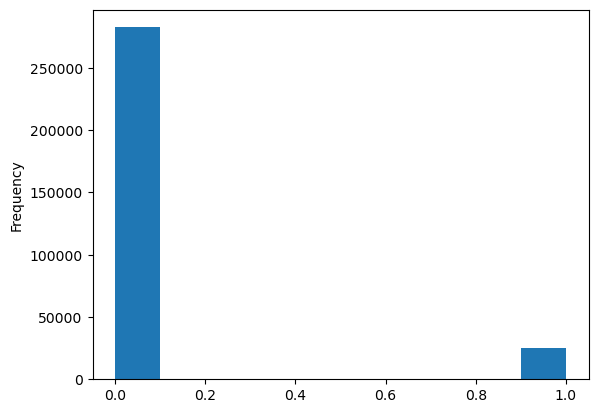

In [124]:
app_train['TARGET'].astype(int).plot.hist()
plt.show()

In [125]:
# la distribution des valeurs prises par la variable cible est déséquilibrée. Cela peut diminuer la précision du modèle de classification supervisée.


In [7]:
df_income = app_test[['AMT_INCOME_TOTAL']]
df_credit = app_test[['AMT_CREDIT']]
                
inc = app_test[app_test['SK_ID_CURR']==100001][['AMT_INCOME_TOTAL']]
cred = app_test[app_test['SK_ID_CURR']==100001][['AMT_CREDIT']]

inc.iloc[0]['AMT_INCOME_TOTAL']



135000.0

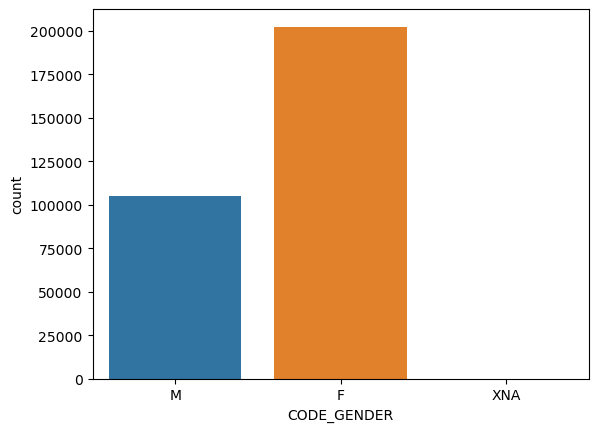

In [8]:
sns.countplot(data=app_train,x='CODE_GENDER')
plt.show()

In [9]:
list(app_train.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [10]:
app_train['SK_ID_CURR'].dtypes

dtype('int64')

In [11]:
app_train.shape

(307511, 122)

In [12]:
## Couper le dataset en train puis test.
## comment fonctionne AUC
## beta doit-il être sup ou inf à 1 ? Et pourquoi ?
## Ou place-t-on le SMOTE ? Si SMOTE galère, utiliser under sampling ou weight.   

In [13]:
app_train['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [14]:
app_test['CODE_GENDER']

0        F
1        M
2        M
3        F
4        M
        ..
48739    F
48740    F
48741    F
48742    M
48743    F
Name: CODE_GENDER, Length: 48744, dtype: object

In [15]:
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [16]:
app_train[app_train['CODE_GENDER']=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


# Label / One hot encoder

In [17]:
# train

In [18]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [19]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)

print('Training Features shape: ', app_train.shape)


Training Features shape:  (307511, 243)


In [20]:
# test

In [21]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_test:
    if app_test[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_test[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_test[col])
            # Transform both training and testing data
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [22]:
# one-hot encoding of categorical variables
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_test.shape)


Training Features shape:  (48744, 238)


In [23]:
colonnes_new_clients_a = list(app_test.columns)
colonnes_anciens_clients_a = list(app_train.columns)

difference_a = set(colonnes_new_clients_a).difference(set(colonnes_anciens_clients_a))
difference_b = set(colonnes_anciens_clients_a).difference(set(colonnes_new_clients_a))

In [24]:
difference_a

{'CODE_GENDER'}

In [25]:
difference_b

{'CODE_GENDER_F',
 'CODE_GENDER_M',
 'CODE_GENDER_XNA',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_INCOME_TYPE_Maternity leave',
 'TARGET'}

### correction des colonnes :

In [26]:
app_test.rename(columns={'CODE_GENDER':'CODE_GENDER_M'},inplace=True)


In [27]:
app_test['CODE_GENDER_M']

0        0
1        1
2        1
3        0
4        1
        ..
48739    0
48740    0
48741    0
48742    1
48743    0
Name: CODE_GENDER_M, Length: 48744, dtype: int32

In [28]:
colonnes_new_clients_a = list(app_test.columns)
colonnes_anciens_clients_a = list(app_train.columns)

difference_a = set(colonnes_new_clients_a).difference(set(colonnes_anciens_clients_a))
difference_b = set(colonnes_anciens_clients_a).difference(set(colonnes_new_clients_a))

In [29]:
difference_a

set()

In [30]:
difference_b

{'CODE_GENDER_F',
 'CODE_GENDER_XNA',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_INCOME_TYPE_Maternity leave',
 'TARGET'}

In [31]:
UN = [1]*(app_test.shape[0])

In [32]:
app_test['CODE_GENDER_F'] = UN - app_test['CODE_GENDER_M']

In [33]:
app_test['CODE_GENDER_XNA']= UN

In [34]:
app_test['NAME_FAMILY_STATUS_Unknown']=UN

In [35]:
app_test['NAME_INCOME_TYPE_Maternity leave']=UN

In [36]:
colonnes_new_clients_a = list(app_test.columns)
colonnes_anciens_clients_a = list(app_train.columns)

difference_a = set(colonnes_new_clients_a).difference(set(colonnes_anciens_clients_a))
difference_b = set(colonnes_anciens_clients_a).difference(set(colonnes_new_clients_a))

In [37]:
difference_a

set()

In [38]:
difference_b

{'TARGET'}

# Anomalies

In [39]:
# train

In [40]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [41]:
# test :

(app_test['DAYS_BIRTH'] / -365).describe()

count    48744.000000
mean        44.022150
std         11.851782
min         20.104110
25%         34.235616
50%         43.246575
75%         53.800000
max         69.027397
Name: DAYS_BIRTH, dtype: float64

In [42]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [43]:
app_test['DAYS_EMPLOYED'].describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

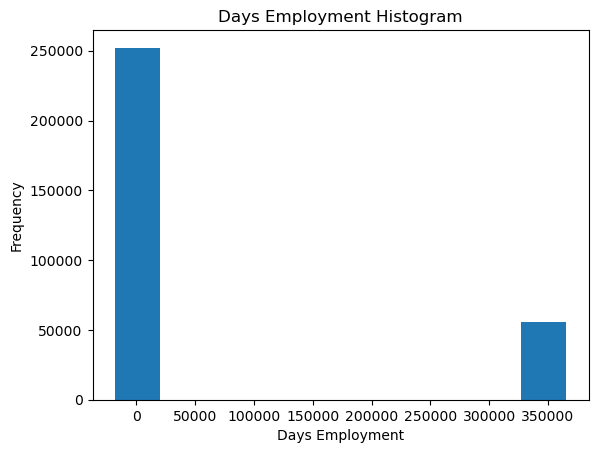

In [44]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')
plt.show()

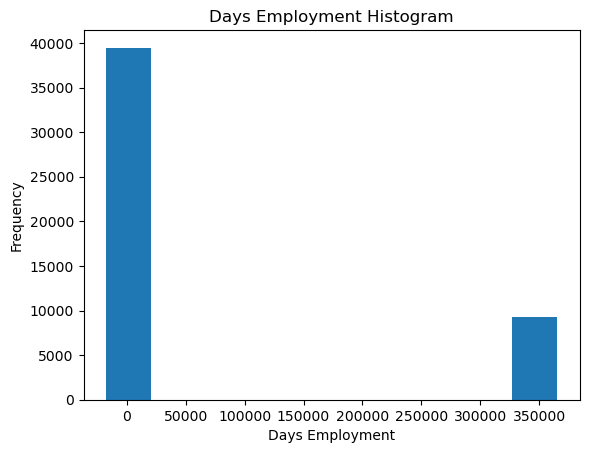

In [45]:
app_test['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')
plt.show()

In [46]:
#train
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


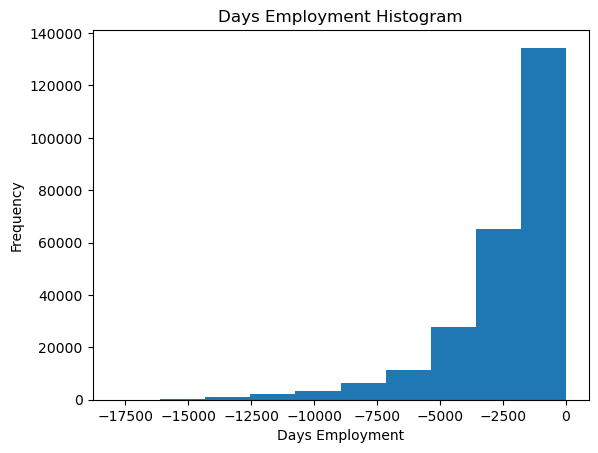

In [47]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');
plt.show()

# Gestion des Nan

In [48]:
app_train = app_train.fillna(app_train.median())

In [49]:
app_test = app_test.fillna(app_test.median())

# Création train/test

In [50]:
y = app_train['TARGET']

if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
Xi = train.copy()

if 'SK_ID_CURR' in Xi:
    train_2 = Xi.drop(columns = ['SK_ID_CURR'])
else:
    train_2 = Xi.copy()
    
Xj = train_2.copy()
    



In [51]:
if 'SK_ID_CURR' in app_test:
    app_test_2 = app_test.drop(columns = ['SK_ID_CURR'])
else:
    app_test_2 = app_test.copy()
    
X_app_test = app_test_2.copy()

In [52]:
if 'DAYS_EMPLOYED_ANOM' in Xj:
    train_3 = Xj.drop(columns = ['DAYS_EMPLOYED_ANOM'])
else:
    train_3 = Xj.copy()
    
X = train_3.copy()

In [53]:
colonnes_new_clients_b = list(X_app_test.columns)
colonnes_anciens_clients_b = list(X.columns)

difference_a = set(colonnes_new_clients_b).difference(set(colonnes_anciens_clients_b))
difference_b = set(colonnes_anciens_clients_b).difference(set(colonnes_new_clients_b))

In [54]:
difference_a

set()

In [55]:
difference_b

set()

In [56]:
list(X.columns)

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG'

In [57]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.2)

In [58]:
# exporter le df pour en tirer les noms de features par la suite.

#X.head(1).to_csv('feature_names.csv')


In [59]:
# standardiser les données
from sklearn import preprocessing

X_train_std = preprocessing.StandardScaler().fit_transform(X_train)
X_test_std = preprocessing.StandardScaler().fit_transform(X_test)

In [60]:
X_train_std.shape

(246008, 241)

In [61]:
X_train_std_T = np.transpose(X_train_std)
X_train_std_T.shape

(241, 246008)

In [62]:
np.transpose(X_train_std[0])

array([-3.24769255e-01,  1.39325756e+00, -1.50685106e+00, -5.77995841e-01,
       -4.43282673e-02, -1.36155456e+00, -1.48555088e+00, -1.33576745e+00,
       -3.06710329e-01,  9.81780901e-02,  1.50511418e-01, -2.98969524e+00,
        9.03761915e-01,  1.96270941e+00,  2.01616591e-03,  4.69047391e-01,
       -4.98401468e-01,  4.31879679e-02, -6.24563767e-01, -2.45768517e-01,
       -1.26612652e+00, -1.02599319e-01, -6.23009611e-02,  1.20587379e+00,
       -1.23299580e-01, -2.31485422e-01, -2.06089880e-01, -2.90458671e-01,
       -5.47176464e-01, -4.68144215e-01, -3.81466595e-01, -1.80461468e+00,
        1.11075075e-01, -1.22175744e-01,  1.70567664e-01, -4.69519050e-02,
       -9.17971414e-01,  3.18602692e-01, -3.68341817e-01,  8.90536373e-01,
       -2.80273098e-01, -8.15667254e-02,  3.15297394e-01, -1.48649160e-01,
       -1.65012493e-01, -1.01778889e-01, -3.04492897e-01, -5.60392109e-02,
        2.55070234e-01, -3.38459464e-02, -8.93023098e-01,  3.80635013e-01,
       -3.55658485e-01,  

# Création des modèles sans optimisation des paramètres

## Dummy

In [63]:
from sklearn.dummy import DummyClassifier


In [19]:
dummy_class = DummyClassifier()

start_time = timeit.default_timer()

dummy_class.fit(X_train, y_train)
elapsed = timeit.default_timer() - start_time

print(elapsed)

0.01602927700002965


In [20]:
y_pred = dummy_class.predict(X_test)


In [21]:
dummy_class.score(X, y)

0.9192711805431351

## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression


In [ ]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.01)

# Train on the training data
log_reg.fit(X_train_std, y_train)

LogisticRegression(C=0.01)

In [ ]:
y_pred_LR = log_reg.predict(X_test_std)

In [ ]:
log_reg.score(X,y)

0.5873968736077734

## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
# Train on the training data
random_forest.fit(X_train_std, y_train)

# Make predictions on the test data
y_pred_RF = random_forest.predict(X_test_std)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.2s finished


In [ ]:
random_forest.score(X,y)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.1s finished


0.9192711805431351

## XG Boost

In [66]:
import xgboost

In [ ]:
#XGB = xgboost.XGBRegressor(n_estimators=100,max_depth=10,eta=0.01,subsample=1,colsample_bytree=1)
XGB = xgboost.XGBClassifier()

In [ ]:
# Train on the training data
XGB.fit(X_train_std, y_train)

# Make predictions on the test data
y_pred_XGB = XGB.predict(X_test_std)

In [71]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_XGB)

NameError: name 'y_pred_XGB' is not defined

## Light GBM

In [67]:
import lightgbm

In [ ]:
LGBM = lightgbm.LGBMClassifier()


In [ ]:
# Train on the training data
LGBM.fit(X_train_std, y_train)

# Make predictions on the test data
y_pred_LGBM = LGBM.predict(X_test_std)

In [ ]:
LGBM.score(X,y)

0.9192711805431351

# Optimisation des modèles avec l'AUC

In [68]:
from sklearn.metrics import roc_auc_score

# roc_auc_score(y_test, y_pred_LGBM)

from sklearn.model_selection import GridSearchCV


## Linear Regression

In [ ]:
grid_LR = GridSearchCV(LogisticRegression(), param_grid={'C':[0.01,0.05,1,2]}, cv=5,
            scoring='roc_auc')

In [ ]:
start_time = timeit.default_timer()

grid_LR.fit(X_train_std, y_train)

elapsed = timeit.default_timer() - start_time

print(elapsed)

9.682986514999982


In [ ]:
grid_LR.best_params_

{'C': 0.01}

In [ ]:
model_LR = LogisticRegression(C=0.01)

In [ ]:
# Train on the training data
model_LR.fit(X_train_std, y_train)

# Extract feature importances
    #feature_importance_values_modelLR = model_LR.feature_importances_
    #feature_importances_modelLR = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
### predictions_XGB = XGB.predict(test)[:, 1]
predictions_modelLR = model_LR.predict(X_test_std)

roc_auc_score(y_test,predictions_modelLR)

0.503073356319106

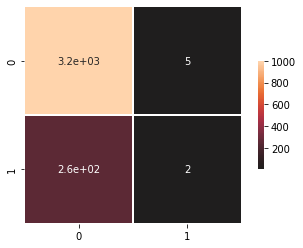

In [ ]:
cm_lr = confusion_matrix(y_test, predictions_modelLR)

import seaborn as sn

sn.heatmap(cm_lr, vmax=1000, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Random Forest (too long to optimize)

In [ ]:
grid_RFC = GridSearchCV(RandomForestClassifier(), param_grid={'max_features':[0.0,1.0],
           'n_estimators':[100,500],
           'max_depth':[5.0,20.0],
           'min_samples_leaf':[1,5],
           'min_samples_split':[0.1,1.0],
           'n_jobs':[-1,1]}, cv=3,
            scoring='roc_auc')


In [ ]:
start_time = timeit.default_timer()

grid_RFC.fit(X_train_std, y_train)

elapsed = timeit.default_timer() - start_time

print(elapsed)

KeyboardInterrupt: ignored

In [ ]:
grid_RFC.best_params_

In [ ]:
modelRFC = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
# Train on the training data
modelRFC.fit(X_train_std, y_train)

# Extract feature importances
  #feature_importance_values_modelXGB = modelXGB.feature_importances_
  #feature_importances_modelXGB = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions_modelRFC = modelRFC.predict(X_test_std)

roc_auc_score(y_test,predictions_modelRFC)


## XG Boost

In [ ]:
grid_XGB = GridSearchCV(xgboost.XGBClassifier(eval_metric='logloss'), param_grid={'n_estimators':[100,500],
           'max_depth':[5,20],
           'eta':[0.01,1],
           'subsample':[0.1,2],
           'colsample_bytree':[0.1,2]}, cv=5,
            scoring='roc_auc')

In [ ]:
start_time = timeit.default_timer()

grid_XGB.fit(X_train_std, y_train)

elapsed = timeit.default_timer() - start_time

print(elapsed)



262.185685504


In [ ]:
grid_XGB.best_params_

{'colsample_bytree': 0.1,
 'eta': 0.01,
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.1}

In [ ]:
modelXGB = xgboost.XGBClassifier( colsample_bytree= 0.1, eta= 0.01, max_depth= 5, n_estimators= 100, subsample= 0.1,
                                 eval_metric='logloss')

In [ ]:
# Train on the training data
modelXGB.fit(X_train_std, y_train)

# Extract feature importances
  #feature_importance_values_modelXGB = modelXGB.feature_importances_
  #feature_importances_modelXGB = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions_modelXGB = modelXGB.predict(X_test_std)

roc_auc_score(y_test,predictions_modelXGB)


0.5038461538461538

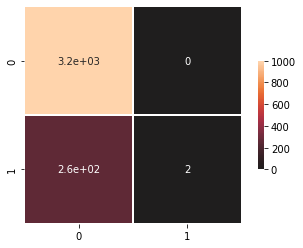

In [ ]:
cm_xgb = confusion_matrix(y_test, predictions_modelXGB)

import seaborn as sn

sn.heatmap(cm_xgb, vmax=1000, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Light GBM

In [ ]:
grid_LGBM = GridSearchCV(lightgbm.LGBMClassifier(), param_grid={'num_leaves': [30, 150],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [100, 200],
    'lambda_l1': [0, 1],
    'lambda_l2': [0, 1]}, cv=5,
            scoring='roc_auc')

In [ ]:
start_time = timeit.default_timer()

grid_LGBM.fit(X_train_std, y_train)

elapsed = timeit.default_timer() - start_time

print(elapsed)

358.45478548100004


In [ ]:
grid_LGBM.best_params_

{'lambda_l1': 1,
 'lambda_l2': 1,
 'min_data_in_leaf': 200,
 'num_leaves': 30,
 'reg_alpha': 0.1}

In [ ]:
model_LGBM = lightgbm.LGBMClassifier(lambda_l1= 0, lambda_l2 = 1, min_data_in_leaf = 200, num_leaves = 30, reg_alpha = 0.1)

In [ ]:
# Train on the training data
model_LGBM.fit(X_train_std, y_train)

# Extract feature importances
    #feature_importance_values_modelLGBM = model_LGBM.feature_importances_
    #feature_importances_modelLGBM = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
### predictions_XGB = XGB.predict(test)[:, 1]
predictions_modelLGBM = model_LGBM.predict(X_test_std)

roc_auc_score(y_test,predictions_modelLGBM)


0.5045327547259542

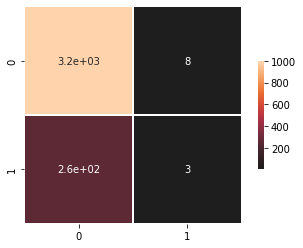

In [ ]:
cm_lgbm = confusion_matrix(y_test, predictions_modelLGBM)

import seaborn as sn

sn.heatmap(cm_lgbm, vmax=1000, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
## test pas très concluant. Il n'y a presque pas de 1 à prédire.
## refaisons le test en rééquilibrant les valeurs et regardons l'impact sur le score AUR également.

# Model optimization with ADASYN / SMOTE / Undersampling from IMBLEARN:

In [69]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline

In [70]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler




can use this : SMOTE(sampling_strategy=0.1), where 0.1 corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling. Therefore, the ratio is expressed as \alpha_{os} = N_{rm} / N_{M} where N_{rm} is the number of samples in the minority class after resampling and N_{M} is the number of samples in the majority class.

### Régression Linéaire

In [ ]:
LR = LogisticRegression()
adasyn = ADASYN()
grid_LR={'class__C':[0.01,0.05,1,2]}

# define pipeline
pipeline_LR = Pipeline([('sampling', adasyn), ('class', LR)])

# evaluate pipeline

grid_cv_LR = GridSearchCV(pipeline_LR, grid_LR, scoring = 'roc_auc', cv = 5)
   
grid_cv_LR.fit(X_train_std, y_train)

grid_cv_LR.best_score_


0.7352652285687277

In [ ]:
grid_cv_LR.best_params_

{'class__C': 0.05}

In [ ]:
LR_opt = LogisticRegression(C=0.01)

In [ ]:
# Train on the training data
LR_opt.fit(X_train_std, y_train)

pred_LR_opt = LR_opt.predict(X_test_std)

roc_auc_score(y_test, pred_LR_opt)

0.503073356319106

### XGB

In [ ]:
XGB = xgboost.XGBClassifier()
adasyn = ADASYN()
grid_XGB={'class__n_estimators':[100,500],
           'class__max_depth':[5,20],
           'class__eta':[0.01,1],
           'class__subsample':[0.1,2],
           'class__colsample_bytree':[0.1,2]}

# define pipeline
pipeline_XGB = Pipeline([('sampling', adasyn), ('class', XGB)])

# evaluate pipeline

grid_cv_XGB = GridSearchCV(pipeline_XGB, grid_XGB, scoring = 'roc_auc', cv = 5)
   
grid_cv_XGB.fit(X_train_std, y_train)

grid_cv_XGB.best_score_

KeyboardInterrupt: ignored

In [ ]:
grid_cv_XGB.best_params_

### Light GBM

In [76]:
LGBM = lightgbm.LGBMClassifier()
adasyn = ADASYN()
grid_LGBM = {'class__num_leaves': [30, 150],
    'class__reg_alpha': [0.1, 0.5],
    'class__min_data_in_leaf': [100, 200],
    'class__lambda_l1': [0, 1],
    'class__lambda_l2': [0, 1]}

# define pipeline
pipeline_LGBM = Pipeline([('sampling', adasyn), ('class', LGBM)])

# evaluate pipeline

grid_cv_LGBM = GridSearchCV(pipeline_LGBM, grid_LGBM, scoring = 'roc_auc', cv = 5)
   
grid_cv_LGBM.fit(X_train_std, y_train)

grid_cv_LGBM.best_score_

KeyboardInterrupt: 

In [ ]:
grid_cv_LGBM.best_params_

see : https://towardsdatascience.com/imbalanced-class-sizes-and-classification-models-a-cautionary-tale-part-2-cf371500d1b3
La différence entre le score AUC moyen et celui sur la partie de test est trop élevée.
Anomalie ?

# Création de notre métrique métier

### On veut donner plus de poids aux faux postifs :

In [71]:
from sklearn.metrics import fbeta_score, make_scorer

# pour le fbeta_score, on choisit un beta élevé. En résumé, plus le f_score sera élevé, moins on aura de faux positifs.

f_scorer = make_scorer(fbeta_score, beta=10)

f_scorer

make_scorer(fbeta_score, beta=10)

### Régression Linéaire

In [ ]:
LR = LogisticRegression()
adasyn = ADASYN()
grid_LR={'class__C':[0.01,0.05,1,2]}

under = RandomUnderSampler(sampling_strategy=0.5)


# define pipeline
pipeline_LR = Pipeline([('sampling', adasyn), ('class', LR)])

# evaluate pipeline

grid_cv_LR = GridSearchCV(pipeline_LR, grid_LR, scoring = f_scorer, cv = 5)
   
grid_cv_LR.fit(X_train_std, y_train)

grid_cv_LR.best_score_

In [ ]:
grid_cv_LR.best_params_

{'class__C': 0.05}

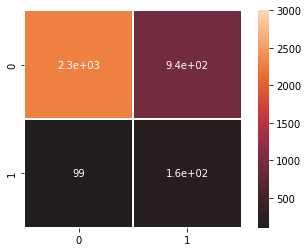

In [ ]:
cm_lr = confusion_matrix(y_test, grid_cv_LR.predict(X_test_std))

import seaborn as sn

sn.heatmap(cm_lr, vmax=3000, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})

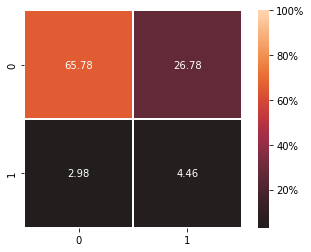

In [ ]:
cm_lr = confusion_matrix(y_test, grid_cv_LR.predict(X_test_std))
cm_lr_prcnt = cm_lr/np.sum(cm_lr)*100

sn.heatmap(cm_lr_prcnt, vmax=100, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": 1,'format': '%.0f%%'})


### XG Boost

In [ ]:
XGB = xgboost.XGBClassifier()
adasyn = ADASYN()
smote = SMOTE()

grid_XGB={'class__n_estimators':[600,700],
           'class__max_depth':[40,50],
           'class__eta':[1,2],
           'class__subsample':[0.01,0.05],
           'class__colsample_bytree':[0.1]}

# define pipeline
pipeline_XGB = Pipeline([('sampling', smote), ('class', XGB)])

# evaluate pipeline

grid_cv_XGB = GridSearchCV(pipeline_XGB, grid_XGB, scoring = f_scorer, cv = 3)
   
grid_cv_XGB.fit(X_train_std, y_train)

grid_cv_XGB.best_score_

In [ ]:
grid_cv_XGB.best_params_

In [ ]:
cm_xgb = confusion_matrix(grid_cv_XGB.predict(X_test_std),y_test)

import seaborn as sn

sn.heatmap(cm_xgb, vmax=250, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
y_test.value_counts

<bound method IndexOpsMixin.value_counts of 8527     0
3016     0
11611    0
4320     0
8578     0
        ..
8942     0
12774    0
13634    0
11320    1
222      0
Name: TARGET, Length: 3495, dtype: int64>

### Light GBM (beaucoup trop long avec SMOTE, on travaille avec le under sampling)

In [147]:
under = RandomUnderSampler(sampling_strategy=0.5)

X_res_test, y_res_test = under.fit_resample(X, y)

X.shape


(307511, 241)

In [148]:
y_res_test.value_counts()

0    49650
1    24825
Name: TARGET, dtype: int64

In [149]:
LGBM = lightgbm.LGBMClassifier()
adasyn = ADASYN()
smote = SMOTE()

under = RandomUnderSampler(sampling_strategy=0.5)


grid_LGBM = {'class__num_leaves': [200,300],
    'class__reg_alpha': [0, 0.5],
    'class__min_data_in_leaf': [800,1000],
    'class__lambda_l1': [0, 1],
    'class__lambda_l2': [1, 2]}

# define pipeline
pipeline_LGBM = Pipeline([('sampling', under), ('class', LGBM)])

# evaluate pipeline

grid_cv_LGBM = GridSearchCV(pipeline_LGBM, grid_LGBM, scoring = f_scorer, cv = 3)
   
grid_cv_LGBM.fit(X_train_std, y_train)

grid_cv_LGBM.best_score_

[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf

0.4295288176638628

In [150]:
grid_cv_LGBM.best_params_

{'class__lambda_l1': 0,
 'class__lambda_l2': 1,
 'class__min_data_in_leaf': 800,
 'class__num_leaves': 200,
 'class__reg_alpha': 0.5}

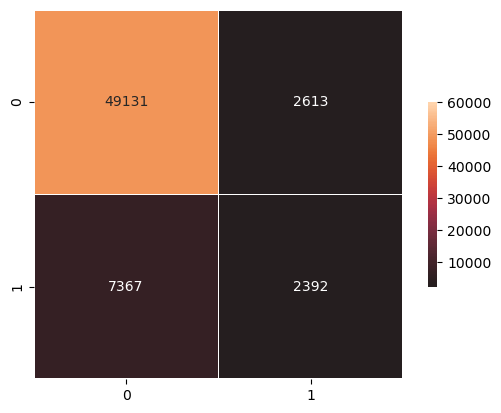

In [78]:
cm_lgbm = confusion_matrix(grid_cv_LGBM.predict(X_test_std),y_test)

import seaborn as sn

sn.heatmap(cm_lgbm, vmax=60000, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='g')

plt.show()

In [84]:
model_LGBM_pickle.predict(X_test_std)[0]

0

### Sérialiser un modèle :

In [72]:
from joblib import dump, load
#dump(grid_cv_LGBM, 'grid_cv_LGBM.joblib') 
import pickle

In [153]:
grid_cv_LGBM = load('grid_cv_LGBM.joblib') 

In [154]:
grid_cv_LGBM.best_params_

{'class__lambda_l1': 0,
 'class__lambda_l2': 1,
 'class__min_data_in_leaf': 800,
 'class__num_leaves': 200,
 'class__reg_alpha': 0.5}

In [155]:


# Saving model to disk
pickle.dump(grid_cv_LGBM, open('model_LGBM_pickle.pkl','wb'))



In [75]:
# Loading model to compare the results
model_LGBM_pickle = pickle.load(open('model_LGBM_pickle.pkl','rb'))

In [88]:
X_train_std.shape

(246008, 241)

In [104]:
model_LGBM_pickle.predict(X_train_std[2])

ValueError: Expected 2D array, got 1D array instead:
array=[-3.25189723e-01  1.39146753e+00 -1.50338103e+00 -5.77392959e-01
 -2.16369240e-01  5.21306489e-01  3.01255739e-01  3.70604944e-01
  8.48236529e-01 -7.20788744e-01  2.92255307e-01 -1.06404640e+00
  1.93748910e-01 -4.27850626e-01  2.01616591e-03  4.69453662e-01
  2.00493189e+00  4.32351787e-02  1.59987719e+00 -2.45452194e-01
 -1.67292202e-01 -2.06999583e+00 -2.05442231e+00 -1.82663394e-02
 -1.24146292e-01 -2.30929354e-01 -2.04929653e-01 -2.91510530e-01
 -5.47345796e-01 -4.67756990e-01 -3.83717654e-01  9.42130162e-01
 -2.29419351e-01 -7.87904956e-01 -9.47073025e-02 -1.43677130e-01
 -1.74605235e+00 -1.82687793e-01 -3.68792560e-01 -8.37154462e-02
 -2.81368669e-01 -8.36574030e-02 -1.41321173e-01 -1.49871232e-01
 -2.68859589e-01 -1.01548155e-01 -3.05313467e-01 -7.35469964e-01
 -9.87033826e-02 -1.24524985e-01 -1.71210234e+00 -1.32782988e-01
 -3.56386091e-01 -5.18597675e-02 -2.65635875e-01 -7.05075263e-02
 -1.47305134e-01 -1.60259502e-01 -2.12767033e-01 -9.63653446e-02
 -2.60545152e-01 -7.69984538e-01 -9.51011224e-02 -1.42325614e-01
 -1.74173612e+00 -1.75036333e-01 -3.65637108e-01 -7.98784902e-02
 -2.78954235e-01 -8.24219707e-02 -1.41380689e-01 -1.52013086e-01
 -2.58589895e-01 -1.00497686e-01 -2.95293162e-01 -2.59522946e-01
 -5.86746279e-01 -3.20226536e-01 -5.84920820e-01 -2.75445685e-01
  6.07328352e-01 -7.26956688e-03 -1.56224941e+00 -8.55416309e-03
 -1.23452391e-01 -3.11646417e-01 -1.43997680e-02  3.35868290e+00
 -6.17672224e-02 -4.93862791e-03 -6.24924756e-02 -2.85129497e-03
 -5.99504406e-02 -5.37999870e-02 -3.51747224e-02 -9.99850136e-02
 -1.61313930e-02 -9.02371421e-02 -2.34321136e-02 -2.29052025e-02
 -1.85913056e-02 -7.07185553e-02 -5.93673646e-02 -1.56595515e-01
 -2.70194245e-01 -2.94155398e-01 -4.40872625e-01 -1.38630769e+00
  1.38633273e+00 -2.85129497e-03 -1.04491078e-01 -3.86687368e-01
 -3.05909113e-02 -5.35333550e-02 -7.60329437e-02 -1.96334999e-01
  4.87060875e-01 -5.70265949e-03 -5.49747374e-01 -4.03235641e-03
 -4.69369836e-01 -2.75484350e-01 -7.80879920e-03 -7.26956688e-03
  9.67173714e-01 -2.33451192e-02 -5.66960583e-01 -1.85961447e-01
 -1.12599528e-01  6.38702040e-01 -3.27104349e-01  7.52152377e-01
 -2.62042132e-01 -4.16702167e-01 -2.85129497e-03 -2.35281248e-01
 -6.11675360e-02  3.56477172e-01 -1.93820198e-01 -9.23870959e-02
 -1.27562612e-01 -2.25378198e-01 -1.81707730e-01 -1.23774409e-01
 -1.41201606e-01 -3.13088666e-01 -2.53849918e-01 -4.27130117e-02
 -1.96066872e-01 -4.18933211e-02  2.13588781e+00 -8.33430540e-02
 -2.72715891e-01 -1.69443132e-01 -9.26105995e-02 -4.98983265e-02
 -3.41377063e-01 -6.39507292e-02 -1.49227838e-01 -6.58145066e-02
 -4.41262230e-01 -4.45050014e-01 -3.53144207e-01 -2.35165770e-01
 -4.43351152e-01 -4.61321997e-01  2.22011344e+00 -3.74204031e-02
 -8.93400462e-02 -9.02142475e-02 -1.40901839e-01  5.31393797e+00
 -5.32268923e-01 -2.93684161e-02 -1.48985695e-01 -3.45317013e-02
 -5.58511870e-02 -4.26173900e-02 -1.86673870e-01 -5.69392601e-02
 -9.90895106e-02 -5.78305497e-02 -1.88088316e-02 -9.34773308e-02
 -3.47082464e-02 -1.42578659e-02 -3.84414135e-02 -1.04252280e-01
 -5.33804028e-02 -4.45827110e-02 -1.91304901e-02 -6.57521782e-02
 -8.55416309e-03 -1.05125334e-01 -4.38443273e-02 -1.51938174e-01
 -3.07899588e-02 -1.93820198e-01 -9.27221561e-02 -3.17665639e-02
 -2.38810654e-01 -8.77781636e-02 -8.41061810e-02 -3.58062538e-02
 -1.60048377e-02 -7.71605080e-02 -1.72590611e-01 -1.03311904e-01
 -7.96017643e-02 -3.78961154e-01 -7.18364333e-02 -4.32351787e-02
 -3.38163493e-02 -7.92129780e-02 -1.06695198e-01 -1.50892910e-02
 -1.25919246e-02 -4.46741575e-02 -1.61773522e-01 -2.56700039e-02
 -8.52263220e-02 -6.21967876e-02 -1.33993692e-01 -6.59700742e-02
 -4.69408526e-01 -1.37149924e-01 -1.36270540e-01 -5.62083484e-01
 -2.02907593e-01  1.02124943e+00 -7.04803703e-02 -6.28520123e-02
 -1.76032056e-01 -8.68564788e-02 -7.68667549e-02 -7.32520554e-02
 -5.23291914e-01 -5.16617794e-01 -1.32794142e-01  9.63919934e-01
 -8.72120908e-02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Best features choice

## features_importances_

In [75]:
features = list(X.columns)

In [159]:
features

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG'

In [39]:
list_test = ['a','b','c']

In [114]:
#del features[0]

In [121]:
len(features)

241

In [ ]:
# Extract feature importances

# Régression Linéaire

# feature_importance_values_modelLR = grid_cv_LR.best_estimator_.feature_importances_

# feature_importances_modelLR = pd.DataFrame({'feature': features, 'importance': feature_importance_values_modelLR})

In [ ]:
# XG Boost

feature_importance_values_modelXGB = grid_cv_XGB.best_estimator_.named_steps["class"].feature_importances_

feature_importances_modelXGB = pd.DataFrame({'feature': features, 'importance': feature_importance_values_modelXGB})

In [51]:
# LGBM


feature_importance_values_modelLGBM = grid_cv_LGBM.best_estimator_.named_steps["class"].feature_importances_

feature_importances_modelLGBM = pd.DataFrame({'feature': features, 'importance': feature_importance_values_modelLGBM})

In [52]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [53]:
#feature_importances_domain_sorted = plot_feature_importances(feature_importances_modelXGB)


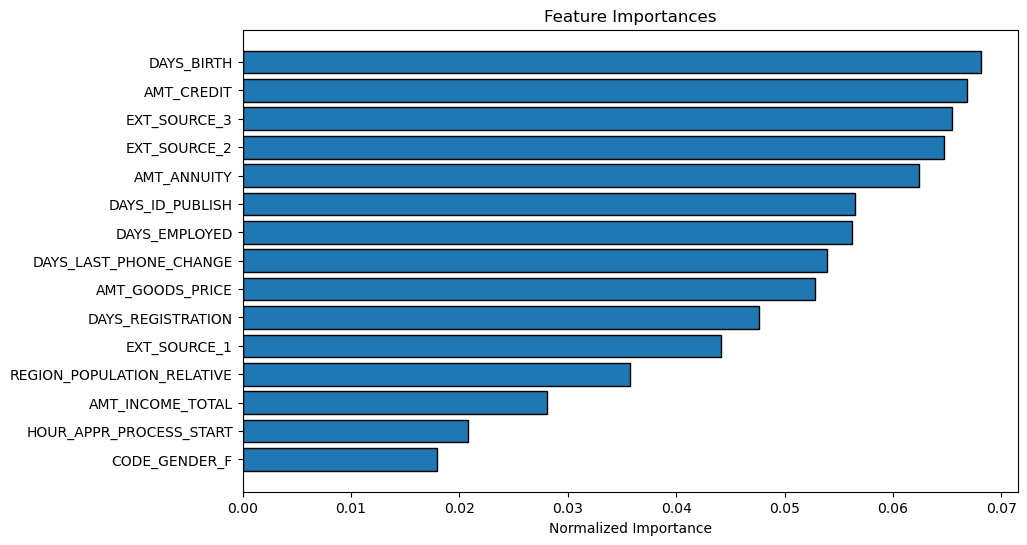

In [54]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_modelLGBM)


## Différence entre application train et application test

In [76]:
colonnes_new_clients = list(X_app_test.columns)
colonnes_anciens_clients = features

In [77]:
difference_1 = set(colonnes_new_clients).difference(set(colonnes_anciens_clients))
difference_2 = set(colonnes_anciens_clients).difference(set(colonnes_new_clients))

In [78]:
difference_1

set()

In [79]:
difference_2

set()

## Shap (trop trop long)

In [80]:
# Train :

sm = SMOTE()
under = RandomUnderSampler(sampling_strategy=0.5)


X_std = preprocessing.StandardScaler().fit_transform(X)

X_res, y_res = under.fit_resample(X_std, y)

In [81]:
pd_X = pd.DataFrame(X_std, columns = features)
pd_X_test = pd.DataFrame( X_test_std, columns = features)
pd_X_train = pd.DataFrame( X_train_std, columns = features)

In [82]:
pd_X['SK_ID_CURR'] = Xi['SK_ID_CURR']

In [174]:
pd_X.columns

Index(['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       ...
       'WALLSMATERIAL_MODE_Block', 'WALLSMATERIAL_MODE_Mixed',
       'WALLSMATERIAL_MODE_Monolithic', 'WALLSMATERIAL_MODE_Others',
       'WALLSMATERIAL_MODE_Panel', 'WALLSMATERIAL_MODE_Stone, brick',
       'WALLSMATERIAL_MODE_Wooden', 'EMERGENCYSTATE_MODE_No',
       'EMERGENCYSTATE_MODE_Yes', 'SK_ID_CURR'],
      dtype='object', length=242)

In [168]:
# exporter le df Xi avec les valeurs des Id :

#pd_X.to_csv('Final_datas.csv')

In [85]:
# take a sample from the dataframe :
pd_X.shape

pd_X_sample = pd_X.sample(n=5000)

# pd_X_sample.to_csv('Final_datas_sample.csv')

In [86]:
pd_X_sample

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,SK_ID_CURR
181502,-0.324395,-0.717914,0.664531,-0.577538,-0.237421,-0.929280,-0.911619,-0.848433,1.078997,-1.869395,...,-0.176135,-0.086733,-0.076281,-0.072886,1.912181,-0.516781,-0.133215,0.963763,-0.08734,310367
161947,-0.324395,1.392925,0.664531,-0.577538,0.104174,-0.128585,1.121750,-0.117297,-0.307717,-0.503211,...,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,1.935056,-0.133215,0.963763,-0.08734,287741
226046,3.082659,-0.717914,0.664531,-0.577538,-0.047646,-0.817476,-0.938941,-0.726577,-0.982854,1.075164,...,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,1.935056,-0.133215,0.963763,-0.08734,361816
78599,-0.324395,-0.717914,0.664531,-0.577538,-0.180488,-0.016065,-0.060578,-0.239153,1.078997,-0.347849,...,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.08734,191112
155782,-0.324395,-0.717914,0.664531,-0.577538,0.047242,0.534212,-0.219236,0.382313,-0.888792,-0.709674,...,5.677469,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,0.963763,-0.08734,280577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82487,-0.324395,1.392925,0.664531,0.807273,-0.047646,-0.770585,-0.286922,-0.811876,-0.745566,1.259170,...,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.08734,195663
64487,-0.324395,-0.717914,0.664531,-0.577538,-0.427196,-1.171895,-1.005696,-1.153073,-1.286876,-1.858167,...,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.08734,174779
8588,-0.324395,1.392925,-1.504820,-0.577538,0.426792,1.234798,1.342505,0.979407,0.310593,-0.540333,...,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.08734,109999
156735,-0.324395,-0.717914,0.664531,-0.577538,0.237017,-0.202554,-0.038534,-0.056369,-0.978806,-1.357477,...,-0.176135,-0.086733,-0.076281,-0.072886,1.912181,-0.516781,-0.133215,0.963763,-0.08734,281669


In [ ]:
# test :

In [87]:
X_app_test_std = preprocessing.StandardScaler().fit_transform(X_app_test)

In [88]:
pd_X_app_test = pd.DataFrame(X_app_test_std, columns = features)

In [89]:
pd_X_app_test['SK_ID_CURR'] = app_test['SK_ID_CURR']

In [90]:
pd_X_app_test.shape

(48744, 242)

In [91]:
# exporter le df pd_X_app_test:

pd_X_app_test_sample = pd_X_app_test.sample(n=1000)

#pd_X_app_test.to_csv('Final_datas_test.csv')
#pd_X_app_test_sample.to_csv('Final_datas_test_sample.csv')

In [188]:
client_dict = pd_X_app_test[pd_X_app_test['SK_ID_CURR']==100001][features].to_dict('records')

In [190]:
client_dict[0]

{'NAME_CONTRACT_TYPE': -0.09533145398791174,
 'FLAG_OWN_CAR': -0.7011745542689035,
 'FLAG_OWN_REALTY': -0.7131538448505038,
 'CNT_CHILDREN': 0.6694881565969916,
 'AMT_INCOME_TOTAL': -0.5599884969361385,
 'AMT_CREDIT': -0.42780873413301457,
 'AMT_ANNUITY': 0.14247543866595844,
 'AMT_GOODS_PRICE': -0.5535797151452805,
 'REGION_POPULATION_RELATIVE': -0.03747724111404046,
 'DAYS_BIRTH': -0.16465438246349146,
 'DAYS_EMPLOYED': -0.733476884270117,
 'DAYS_REGISTRATION': -0.48365642188563335,
 'DAYS_ID_PUBLISH': -0.0569579108024887,
 'OWN_CAR_AGE': 1.4272409134481419,
 'FLAG_MOBIL': -0.13843558464245112,
 'FLAG_EMP_PHONE': 0.004529433338339536,
 'FLAG_WORK_PHONE': 0.48476236723462635,
 'FLAG_CONT_MOBILE': -0.5073366700989753,
 'FLAG_PHONE': 0.0400345061374174,
 'FLAG_EMAIL': -0.5975710435325665,
 'CNT_FAM_MEMBERS': 2.268994273932005,
 'REGION_RATING_CLIENT': -0.1648298667042445,
 'REGION_RATING_CLIENT_W_CITY': -0.07300435231800531,
 'HOUR_APPR_PROCESS_START': -0.024421190814144924,
 'REG_REGIO

In [43]:
#pd_X[pd_X['SK_ID_CURR']==100010][features].to_json("justpourfun.json")

pd_X[pd_X['SK_ID_CURR']==100010][features].to_dict('records')

[{'NAME_CONTRACT_TYPE': -0.32439532071783306,
  'FLAG_OWN_CAR': 1.3929253888690825,
  'FLAG_OWN_REALTY': 0.6645313933120616,
  'CNT_CHILDREN': -0.5775378417542217,
  'AMT_INCOME_TOTAL': 0.8063421668903265,
  'AMT_CREDIT': 2.313035645118126,
  'AMT_ANNUITY': 1.0326406112567148,
  'AMT_GOODS_PRICE': 2.685391023697849,
  'REGION_POPULATION_RELATIVE': -1.2830439955556867,
  'DAYS_BIRTH': -0.6445959750003284,
  'DAYS_EMPLOYED': 0.8438416599580361,
  'DAYS_REGISTRATION': 0.11045515659072767,
  'DAYS_ID_PUBLISH': 0.4075677914286786,
  'OWN_CAR_AGE': -0.28685733886036036,
  'FLAG_MOBIL': 0.0018033099474847277,
  'FLAG_EMP_PHONE': 0.4686968611426978,
  'FLAG_WORK_PHONE': 2.003955604185878,
  'FLAG_CONT_MOBILE': 0.04324454422135102,
  'FLAG_PHONE': -0.6252591284784353,
  'FLAG_EMAIL': -0.2452152537449905,
  'CNT_FAM_MEMBERS': -0.1676383858310608,
  'REGION_RATING_CLIENT': 1.8614445354196958,
  'REGION_RATING_CLIENT_W_CITY': 1.926416173183041,
  'HOUR_APPR_PROCESS_START': 1.2053857097552836,
  'R

In [52]:
pd_X[pd_X['SK_ID_CURR']==100010][features]

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
7,-0.324395,1.392925,0.664531,-0.577538,0.806342,2.313036,1.032641,2.685391,-1.283044,-0.644596,...,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.08734,-0.468635


In [ ]:
#grid_cv_LGBM.best_estimator_.named_steps["class"]

#### LGBM

In [44]:
# init :
shap.initjs()

In [176]:
## Ajouter le SMOTE une fois sur tout le jeu de données (pas de train/test)


LGBM_best = lightgbm.LGBMClassifier(lambda_l1= 0, lambda_l2= 1, min_data_in_leaf= 800,
 num_leaves= 200, reg_alpha= 0.5)

LGBM_best.fit(X_res, y_res)


from joblib import dump, load
dump(LGBM_best, 'LGBM_best.joblib') 

# Saving model to disk
pickle.dump(LGBM_best, open('LGBM_best.pkl','wb'))

In [49]:
# essayer sur jeu de données plus restreint.
# garder que la partie individu avec SHAP et feature importance pour le global.

In [178]:
Id_Client = 100010
data_for_prediction = pd_X[pd_X['SK_ID_CURR']==Id_Client][features] # use 1 row of data here. Could use multiple rows if desired

# Create object that can calculate shap values
explainer = shap.TreeExplainer(LGBM_best)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

#shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [184]:
app_train[app_train['SK_ID_CURR']==100002]['TARGET']

0    1
Name: TARGET, dtype: int64

#### XGB

NameError: name 'final_datas_test' is not defined

In [ ]:
# init :
shap.initjs()

In [ ]:
XGB_best = xgboost.XGBClassifier(class__colsample_bytree= 0.1,class__eta= 1, class__max_depth= 40, class__n_estimators= 600,
 class__subsample= 0.01)

XGB_best.fit(X_train_std, y_train)


XGBClassifier(class__colsample_bytree=0.1, class__eta=1, class__max_depth=40,
              class__n_estimators=600, class__subsample=0.01)

In [ ]:
explainer = shap.TreeExplainer(XGB_best)
shap_values = explainer.shap_values(X_test_std)

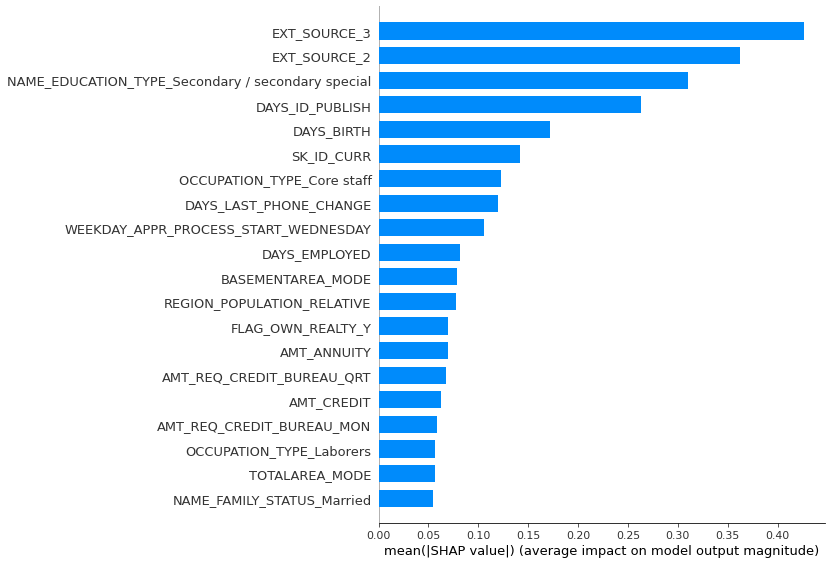

In [ ]:
shap.summary_plot(shap_values, pd_X_test, plot_type="bar")

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER_M,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,CODE_GENDER_F,CODE_GENDER_XNA,NAME_FAMILY_STATUS_Unknown,NAME_INCOME_TYPE_Maternity leave
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,1,0,1,0,1,1,1,1
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0,0,0,1,1,1
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0,0,0,1,1,1
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,1,0,0,1,0,1,1,1,1
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,0,1,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0,0,1,1,1,1
48740,456222,0,0,0,0,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,0,0,1,1,1,1
48741,456223,0,0,1,1,1,202500.0,315000.0,33205.5,315000.0,...,0,0,1,0,1,0,1,1,1,1
48742,456224,0,1,0,0,0,225000.0,450000.0,25128.0,450000.0,...,0,1,0,0,1,0,0,1,1,1


,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,SK_ID_CURR
181502,-0.324395,-0.717914,0.664531,-0.577538,-0.237421,-0.929280,-0.911619,-0.848433,1.078997,-1.869395,...,-0.176135,-0.086733,-0.076281,-0.072886,1.912181,-0.516781,-0.133215,0.963763,-0.08734,310367
161947,-0.324395,1.392925,0.664531,-0.577538,0.104174,-0.128585,1.121750,-0.117297,-0.307717,-0.503211,...,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,1.935056,-0.133215,0.963763,-0.08734,287741
226046,3.082659,-0.717914,0.664531,-0.577538,-0.047646,-0.817476,-0.938941,-0.726577,-0.982854,1.075164,...,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,1.935056,-0.133215,0.963763,-0.08734,361816
78599,-0.324395,-0.717914,0.664531,-0.577538,-0.180488,-0.016065,-0.060578,-0.239153,1.078997,-0.347849,...,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.08734,191112
155782,-0.324395,-0.717914,0.664531,-0.577538,0.047242,0.534212,-0.219236,0.382313,-0.888792,-0.709674,...,5.677469,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,0.963763,-0.08734,280577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82487,-0.324395,1.392925,0.664531,0.807273,-0.047646,-0.770585,-0.286922,-0.811876,-0.745566,1.259170,...,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.08734,195663
64487,-0.324395,-0.717914,0.664531,-0.577538,-0.427196,-1.171895,-1.005696,-1.153073,-1.286876,-1.858167,...,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.08734,174779
8588,-0.324395,1.392925,-1.504820,-0.577538,0.426792,1.234798,1.342505,0.979407,0.310593,-0.540333,...,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.08734,109999
156735,-0.324395,-0.717914,0.664531,-0.577538,0.237017,-0.202554,-0.038534,-0.056369,-0.978806,-1.357477,...,-0.176135,-0.086733,-0.076281,-0.072886,1.912181,-0.516781,-0.133215,0.963763,-0.08734,281669


In [ ]:
# Création sample app test et app train

In [ ]:
pd_X_sample
pd_X_app_test_sample = pd_X_app_test.sample(n=1000)


In [110]:
liste_totale = list(pd_X_sample['SK_ID_CURR'])
liste_test = list(pd_X_app_test_sample['SK_ID_CURR'])


In [111]:
app_train_sample = app_train.query('SK_ID_CURR== @liste_totale')

app_train_sample.shape

#df.query(' column_a == ["val1", "val2", ...]', inplace=True)


(5000, 244)

In [112]:
app_test_sample = app_test.query('SK_ID_CURR== @liste_test')

app_test_sample.shape

(1000, 242)

In [118]:
app_test_sample.sort_values(by=['SK_ID_CURR'],inplace = True)
app_train_sample.sort_values(by=['SK_ID_CURR'],inplace = True)

pd_X_app_test_sample.sort_values(by=['SK_ID_CURR'],inplace = True)
pd_X_sample.sort_values(by=['SK_ID_CURR'],inplace = True)

In [120]:
app_test_sample.to_csv('app_test_sample.csv')
app_train_sample.to_csv('app_train_sample.csv')
pd_X_app_test_sample.to_csv('Final_datas_test_sample.csv')
pd_X_sample.to_csv('Final_datas_sample.csv')

# Création d'un JSON :

100001

In [20]:
app_train.to_json("app_train.json")